In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("dataset.csv")

<AxesSubplot:>

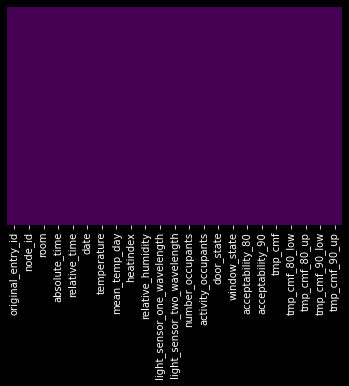

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'absolute_time',
       'relative_time', 'date', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

In [32]:
date_and_count_array = {}
for index, row in df.iterrows():
    date = row['date'][3:10]
    if date in date_and_count_array:
        date_and_count_array[date] = date_and_count_array.get(date, 0) + 1
    else:
        date_and_count_array[date] = 1
date_count_dataframe = pd.DataFrame(data=date_and_count_array.items(), columns=['date', 'count'])
date_count_dataframe.head()

,date,count
0,03/2016,236420
1,04/2016,182518
2,01/2017,63427
3,02/2017,57999


ValueError: Could not interpret input 'count'

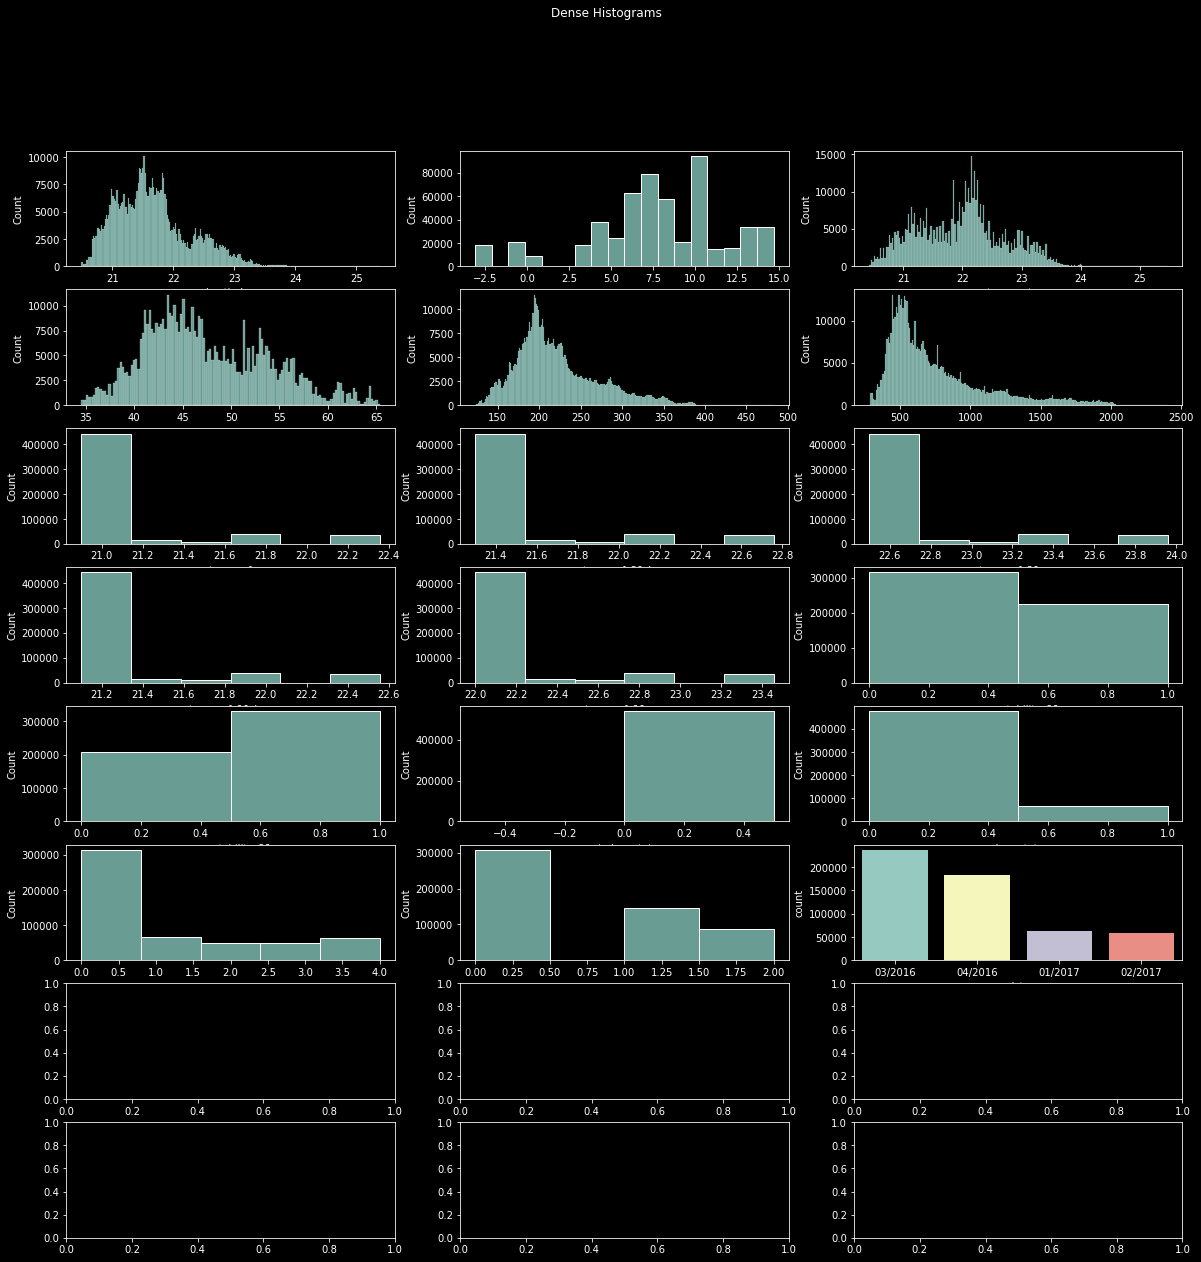

In [37]:
fig, axes = plt.subplots(8, 3, figsize=(20, 20))
fig.suptitle('Dense Histograms')
sns.histplot(ax=axes[0,0],x="heatindex", data=df)
sns.histplot(ax=axes[0,1],x="mean_temp_day", data=df, bins=18)
sns.histplot(ax=axes[0,2],x="temperature", data=df)
sns.histplot(ax=axes[1,0],x="relative_humidity", data=df)
sns.histplot(ax=axes[1,1],x="light_sensor_one_wavelength", data=df)
sns.histplot(ax=axes[1,2],x="light_sensor_two_wavelength", data=df)
sns.histplot(ax=axes[2,0],x="tmp_cmf", data=df, bins=6)
sns.histplot(ax=axes[2,1],x="tmp_cmf_80_low", data=df, bins=6)
sns.histplot(ax=axes[2,2],x="tmp_cmf_80_up", data=df, bins=6)
sns.histplot(ax=axes[3,0],x="tmp_cmf_90_low", data=df, bins=6)
sns.histplot(ax=axes[3,1],x="tmp_cmf_90_up", data=df, bins=6)
sns.histplot(ax=axes[3,2],x="acceptability_90", data=df, bins=2)
sns.histplot(ax=axes[4,0],x="acceptability_80", data=df, bins=2)
sns.histplot(ax=axes[4,1],x="window_state", data=df, bins=2)
sns.histplot(ax=axes[4,2],x="door_state", data=df, bins=2)
sns.histplot(ax=axes[5,0],x="activity_occupants", data=df, bins=5)
sns.histplot(ax=axes[5,1],x="number_occupants", data=df, bins=4)
sns.barplot(ax=axes[5,2], data=date_count_dataframe, x="date", y="count", order=["03/2016", "04/2016", "01/2017", "02/2017"])